# Thompson Sampling

Executa algumas amostras em cada item (caça níquel, banner, etc) e monta a distribuicao:

![](ts-01.png)

As barras é o valor correto que estamos tentando descobrir. Note que essas distribuições que montamos **NÃO** está tentando encontrar a distribuição por trás dos itens.

Executamos uma rodada em cada item, temos os dados abaixo.

![](ts-02.png)

Vimos que a máquina verde tem o melhor resultado, então selecionamos essa máquina. Ajustamos a distribuição com o novo valor e rodamos um novo ciclo, até ter o resultado.

![](ts-03.png)

## Python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


O algoritmo é bem parecido com o UCB.

![](ts-04.png)

In [3]:
import random
# Implementing Thompson Sampling

N = 10000 # Quantidade de rodadas
d = 10
ads_selected = []


numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

sums_of_rewards = [0] * d
total_reward = 0

# para cada rodada
for n in range(0, N):
    ad = 0
    max_random = 0
    # Para cada ad
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta # Guardar o maior random beta
            ad = i # Guardar qual ad tem o maior random beta
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    

In [4]:
total_reward

2632

In [5]:
ad

4

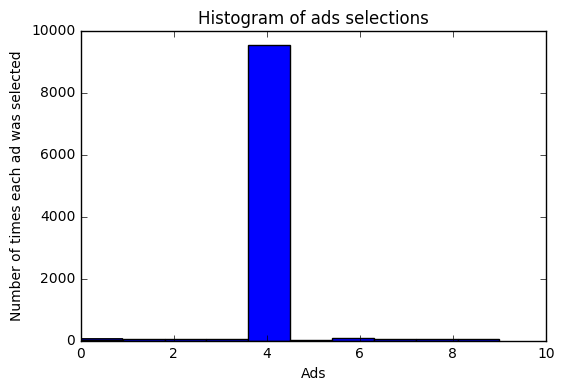

In [6]:
# Visualising th results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()